# **Projeto de Classificação: Predição de Diabetes - Pima Indians Diabetes Database**

## **Introdução**

O objetivo deste projeto é desenvolver um modelo de aprendizado de máquina capaz de prever diagnosticamente se um paciente possui ou não diabetes. A base de dados utilizada é originária do National Institute of Diabetes and Digestive and Kidney Diseases e foi fornecida pelo Kaggle. A seleção dessas instâncias envolveu restrições específicas, sendo todas as pacientes mulheres com pelo menos 21 anos e de herança Pima Indian.

## **Entendimento do Problema**

O problema central abordado neste projeto é a previsão do diagnóstico de diabetes em pacientes com base em medidas diagnósticas específicas. A importância dessa previsão reside na capacidade de antecipar e identificar pacientes em risco, permitindo intervenções médicas precoces e personalizadas.

## **Entendimento dos Dados**

### **Contexto**

Os conjuntos de dados consistem em várias variáveis preditoras médicas e uma variável de destino, "Outcome". As variáveis preditoras incluem o número de gestações que a paciente teve, seu índice de massa corporal (BMI), nível de insulina, idade, entre outras.

### **Fonte dos Dados**

Os dados foram originalmente fornecidos pelo National Institute of Diabetes and Digestive and Kidney Diseases, e a seleção específica de instâncias foi realizada com base em determinadas restrições. A pesquisa original que resultou neste conjunto de dados foi conduzida por Smith, Everhart, Dickson, Knowler e Johannes em 1988, utilizando o algoritmo de aprendizado ADAP para prever o início do diabetes mellitus.

### **Inspiração**

O projeto é inspirado no desafio de construir um modelo de aprendizado de máquina que seja capaz de prever com precisão se os pacientes no conjunto de dados possuem ou não diabetes. A inspiração para esse desafio é a busca por métodos eficazes de identificação e prevenção de condições médicas críticas.


### **Dados no Kaggle**

Os dados utilizados neste projeto podem ser encontrados no Kaggle. [Clique aqui para acessar os dados no Kaggle](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database).


## **Avaliação do Modelo**

A avaliação do modelo será realizada utilizando métricas apropriadas para problemas de classificação binária, como precisão, recall, F1-score e a área sob a curva ROC (AUC-ROC). O objetivo é desenvolver um modelo que alcance alto desempenho na previsão de casos positivos e negativos de diabetes, proporcionando uma base sólida para decisões médicas.

## **Preparação dos Dados**
- Gerar Metadados da ABT (Tabela Analítica de Modelagem)
- Tratamento de missing (nulos)
- Tratamento de categóricas de alta cardinalidade (LabelEncoder)
- Tratamento de categóricas de baixa cardinalidade (OneHotEncoder)
- Aplicar normalização a toda tabela de modelagem (ABT)
- Gerar artefatos para implantação do data prep realizado

### **Bibliotecas que serão utilizadas no projeto**


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import pickle

### **Lendo os dados disponibilizados**

**Dicionário de variáveis:**

**`Pregnancies`:** Número de vezes grávida.

**`Glucose`:** Concentração de glicose no plasma 2 horas após um teste de tolerância à glicose oral.

**`BloodPressure`:** Pressão sanguínea diastólica (mm Hg).

**`SkinThickness`:** Espessura da dobra cutânea do tríceps (mm).

**`Insulin`:** Insulina sérica 2 horas após uma refeição (mu U/ml).

**`BMI`:** Índice de massa corporal (peso em kg/(altura em m)^2).

**`DiabetesPedigreeFunction`:** Função de pedigree de diabetes.

**`Age`:** Idade (anos).

**`Outcome`:** Variável resposta. Se for 1, tem diabetes. Se for 0, não tem diabetes.

In [ ]:
datapath = f'/content/drive/MyDrive/2. Study  Work/Pod Academy/Tarefas/Ciência de Dados/Projetos/Predição de Diabetes/diabetes.csv'

df00 = pd.read_csv(datapath, sep = ',')

df00.shape

(768, 9)

In [ ]:
df00.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df00.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


### **Separando dados para garantir validação cruzada Holdout 70/30**

In [ ]:
# Separar 70% dos dados para treino e 30% para validação
train, test = train_test_split(df00, test_size=0.3, random_state=42)
train.shape,test.shape

((537, 9), (231, 9))

In [ ]:
train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
334,1,95,60,18,58,23.9,0.260,22,0
139,5,105,72,29,325,36.9,0.159,28,0
485,0,135,68,42,250,42.3,0.365,24,1
547,4,131,68,21,166,33.1,0.160,28,0
18,1,103,30,38,83,43.3,0.183,33,0


In [ ]:
# Criando um novo dataframe baseado no original
df_train_01 = train.copy()

### **Metadados**

In [ ]:
# Criar variável para metadados

def generate_metadata(dataframe):
    """
    Gera um dataframe contendo metadados das colunas do dataframe fornecido.

    :param dataframe: DataFrame para o qual os metadados serão gerados.
    :return: DataFrame contendo metadados.
    """

    # Coleta de metadados básicos
    metadata = pd.DataFrame({
        'nome_variavel': dataframe.columns,
        'tipo': dataframe.dtypes,
        'qt_nulos': dataframe.isnull().sum(),
        'percent_nulos': round((dataframe.isnull().sum() / len(dataframe))* 100,2),
        'cardinalidade': dataframe.nunique(),
    })
    metadata = metadata.sort_values(by='tipo')
    metadata = metadata.reset_index(drop=True)

    return metadata

In [ ]:
metadata_df = generate_metadata(df_train_01)
metadata_df

,nome_variavel,tipo,qt_nulos,percent_nulos,cardinalidade
0,Pregnancies,int64,0,0.0,17
1,Glucose,int64,0,0.0,128
2,BloodPressure,int64,0,0.0,44
3,SkinThickness,int64,0,0.0,47
4,Insulin,int64,0,0.0,153
5,Age,int64,0,0.0,51
6,Outcome,int64,0,0.0,2
7,BMI,float64,0,0.0,218
8,DiabetesPedigreeFunction,float64,0,0.0,402


## **Tratamento de Nulos**

Retirar variáveis com >70% nulos

In [ ]:
# Variáveis numéricas
# Filtrando o DataFrame
missing_cutoff = 70
df_numericas_drop_nulos = metadata_df[(metadata_df['percent_nulos'] >= missing_cutoff)]
lista_drop_nulos_numericas = list(df_numericas_drop_nulos.nome_variavel.values)
lista_drop_nulos_numericas

[]

<Axes: >

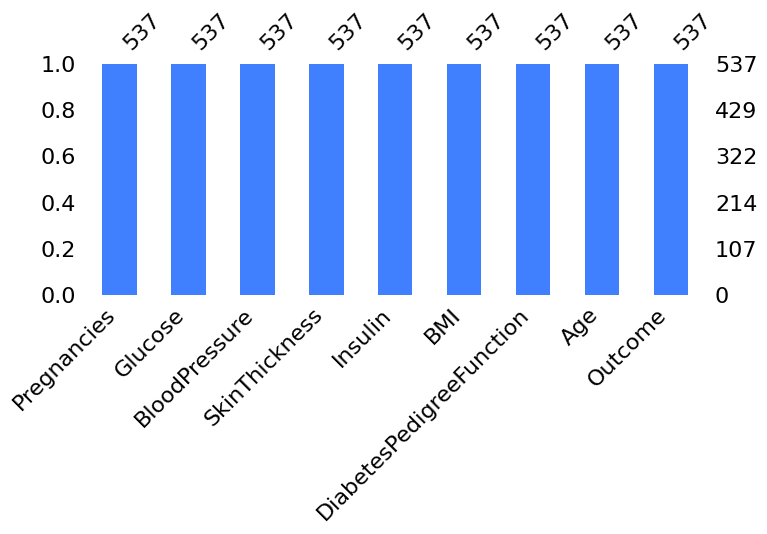

In [ ]:
import missingno as msno

msno.bar(df_train_01, color=(0.25, 0.5, 1), figsize=(8, 3))  # tom de azul claro

### **Label Encoding**

In [ ]:
df_train_02 = df_train_01.copy()

In [ ]:
card_cutoff = 2

df_categ_labelenc = metadata_df[(metadata_df['cardinalidade'] > card_cutoff) & (metadata_df['tipo'] == 'object')]
lista_vars_abt = list(df_train_02.columns)
lista_lenc = list(df_categ_labelenc.nome_variavel.values)

for item in lista_drop_nulos_numericas:
    if item in lista_lenc:
        lista_lenc.remove(item)

print('Lista de vars para Label Encoding: ',lista_lenc)

Lista de vars para Label Encoding:  []


In [ ]:
import pickle
from sklearn.preprocessing import LabelEncoder

encoders = {}

for col in lista_lenc:
    encoder = LabelEncoder()
    df_train_02[col] = encoder.fit_transform(df_train_02[col])

    # Armazena o encoder para a coluna atual em um dicionário
    encoders[col] = encoder

# Salva o dicionário de encoders e a lista de colunas em um arquivo .pkl
data_to_serialize = {
    'encoders': encoders,
    'columns': lista_lenc
}

with open('/content/drive/MyDrive/2. Study  Work/Pod Academy/Tarefas/Ciência de Dados/Projetos/Predição de Diabetes/01 Data Prep/prd_labelenc_a014.pkl', 'wb') as f:
    pickle.dump(data_to_serialize, f)

In [ ]:
# Carregar os encoders e a lista de colunas
with open('/content/drive/MyDrive/2. Study  Work/Pod Academy/Tarefas/Ciência de Dados/Projetos/Predição de Diabetes/01 Data Prep/prd_labelenc_a014.pkl', 'rb') as f:
    loaded_data = pickle.load(f)

loaded_encoders = loaded_data['encoders']
loaded_columns = loaded_data['columns']

# Suponha test_df como sua base de teste
for col in loaded_columns:
    if col in loaded_encoders:
        # Transforma a coluna usando o encoder carregado
        test[col] = loaded_encoders[col].transform(test[col])

### **OneHot Encoding**

In [ ]:
df_train_03 = df_train_02.copy()

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

df_categ_onehot = metadata_df[(metadata_df['cardinalidade'] <= card_cutoff) & (metadata_df['tipo'] == 'object')]
lista_onehot = list(df_categ_onehot.nome_variavel.values)
print('Lista de vars para OneHot Encoding: ',lista_onehot)

# Instanciando o encoder
encoder = OneHotEncoder(drop='first', sparse_output=False)

# Aplicando o one-hot encoding
encoded_data = encoder.fit_transform(df_train_03[lista_onehot])

# Criando um DataFrame com as colunas codificadas, mantendo o índice original
encoded_cols = encoder.get_feature_names_out(lista_onehot)
encoded_df = pd.DataFrame(encoded_data, columns=encoded_cols, index=df_train_03.index)

# Concatenando o DataFrame codificado com o DataFrame original
df_train_04 = pd.concat([df_train_03.drop(lista_onehot, axis=1), encoded_df], axis=1)

df_train_04.head()

Lista de vars para OneHot Encoding:  []


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
334,1,95,60,18,58,23.9,0.260,22,0
139,5,105,72,29,325,36.9,0.159,28,0
485,0,135,68,42,250,42.3,0.365,24,1
547,4,131,68,21,166,33.1,0.160,28,0
18,1,103,30,38,83,43.3,0.183,33,0


In [ ]:
# Salva o encoder e a lista de colunas em um arquivo .pkl
data_to_serialize = {
    'encoder': encoder,
    'columns': lista_onehot
}

with open('/content/drive/MyDrive/2. Study  Work/Pod Academy/Tarefas/Ciência de Dados/Projetos/Predição de Diabetes/01 Data Prep/prd_onehotenc_a014.pkl', 'wb') as f:
    pickle.dump(data_to_serialize, f)

In [ ]:
# Carregar o encoder e a lista de colunas
with open('/content/drive/MyDrive/2. Study  Work/Pod Academy/Tarefas/Ciência de Dados/Projetos/Predição de Diabetes/01 Data Prep/prd_onehotenc_a014.pkl', 'rb') as f:
    loaded_data = pickle.load(f)

loaded_encoder = loaded_data['encoder']
loaded_columns = loaded_data['columns']

# Suponha test_df como sua base de teste
encoded_data_test = loaded_encoder.transform(test[loaded_columns])
encoded_cols_test = loaded_encoder.get_feature_names_out(loaded_columns)
encoded_df_test = pd.DataFrame(encoded_data_test, columns=encoded_cols_test, index=test.index)

test = pd.concat([test.drop(loaded_columns, axis=1), encoded_df_test], axis=1)

### **Retiro Target e Outras Colunas da Tabela**

In [ ]:
lista_spec = ['Outcome']

df_train_05 = df_train_04.drop(axis=1,columns = lista_spec)
df_train_05.shape

(537, 8)

In [ ]:
# colunas que foram retiradas da tabela:

list_columns_drop = ['Outcome']
df_test_aux = test.drop(axis=1,columns=list_columns_drop)

## **Padronização**

In [ ]:
# Foi escolhida  a Normalização mas poderia ser a Padronização
from sklearn.preprocessing import StandardScaler

# Instanciando o scaler
scaler = StandardScaler()

# Selecionando colunas numéricas
numeric_cols = df_train_05.select_dtypes(include=['float64', 'int64','int32']).columns

# Aplicando a normalização
df_train_05[numeric_cols] = scaler.fit_transform(df_train_05[numeric_cols])
df_train_05.shape

(537, 8)

In [ ]:
df_train_05.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
334,-0.836294,-0.800051,-0.535764,-0.157146,-0.189732,-1.060153,-0.614216,-0.948610
139,0.390728,-0.490543,0.128044,0.553619,2.130203,0.646467,-0.909738,-0.434667
485,-1.143050,0.437979,-0.093226,1.393614,1.478536,1.355371,-0.306991,-0.777296
547,0.083972,0.314176,-0.093226,0.036699,0.748669,0.147609,-0.906812,-0.434667
18,-0.836294,-0.552445,-2.195284,1.135154,0.027491,1.486650,-0.839515,-0.006380


In [ ]:
# Salva o scaler em um arquivo .pkl
with open('/content/drive/MyDrive/2. Study  Work/Pod Academy/Tarefas/Ciência de Dados/Projetos/Predição de Diabetes/01 Data Prep/prd_scaler_a014.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [ ]:
# Carregar o scaler
with open('/content/drive/MyDrive/2. Study  Work/Pod Academy/Tarefas/Ciência de Dados/Projetos/Predição de Diabetes/01 Data Prep/prd_scaler_a014.pkl', 'rb') as f:
    loaded_scaler = pickle.load(f)

# Suponha test_df como sua base de teste
test_df_scaled = loaded_scaler.transform(df_test_aux)
test_df = pd.DataFrame(test_df_scaled, columns=df_test_aux.columns, index=df_test_aux.index)
test_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
668,0.697483,-0.707199,-0.646399,0.812079,0.957202,0.265760,-0.116804,0.850192
324,-0.529539,-0.273888,0.293996,0.747464,-0.693688,0.488933,-0.941923,-1.034268
624,-0.529539,-0.397691,-0.314495,-1.320215,-0.693688,-0.154332,-0.912664,-1.034268
690,1.310994,-0.428642,0.570582,-1.320215,-0.693688,-0.968258,1.129653,0.079277
473,1.004239,0.468930,1.123756,-1.320215,-0.693688,-0.272482,-0.760514,1.449793


### **Incluo Target de volta na tabela**

In [ ]:
#### Trazer o target para a tabela pós dataprep

abt_train = df_train_05.merge(train['Outcome'], left_index=True, right_index=True, how='inner')
abt_test = test_df.merge(test['Outcome'], left_index=True, right_index=True, how='inner')

In [ ]:
abt_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
334,-0.836294,-0.800051,-0.535764,-0.157146,-0.189732,-1.060153,-0.614216,-0.948610,0
139,0.390728,-0.490543,0.128044,0.553619,2.130203,0.646467,-0.909738,-0.434667,0
485,-1.143050,0.437979,-0.093226,1.393614,1.478536,1.355371,-0.306991,-0.777296,1
547,0.083972,0.314176,-0.093226,0.036699,0.748669,0.147609,-0.906812,-0.434667,0
18,-0.836294,-0.552445,-2.195284,1.135154,0.027491,1.486650,-0.839515,-0.006380,0


In [ ]:
abt_test.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
668,0.697483,-0.707199,-0.646399,0.812079,0.957202,0.265760,-0.116804,0.850192,0
324,-0.529539,-0.273888,0.293996,0.747464,-0.693688,0.488933,-0.941923,-1.034268,0
624,-0.529539,-0.397691,-0.314495,-1.320215,-0.693688,-0.154332,-0.912664,-1.034268,0
690,1.310994,-0.428642,0.570582,-1.320215,-0.693688,-0.968258,1.129653,0.079277,0
473,1.004239,0.468930,1.123756,-1.320215,-0.693688,-0.272482,-0.760514,1.449793,0


## **Salvando tabelas de treino e teste pós preparação dos dados**

In [ ]:
abt_train.to_csv('/content/drive/MyDrive/2. Study  Work/Pod Academy/Tarefas/Ciência de Dados/Projetos/Predição de Diabetes/abt_train.csv')
abt_test.to_csv('/content/drive/MyDrive/2. Study  Work/Pod Academy/Tarefas/Ciência de Dados/Projetos/Predição de Diabetes/abt_test.csv')